In [ ]:
# IMPORT LIBRARIES
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# LOAD MNIST DATASET
# This dataset has 60,000 training images and 10,000 test images
# Each image is 28x28 pixels with digit labels 0-9
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

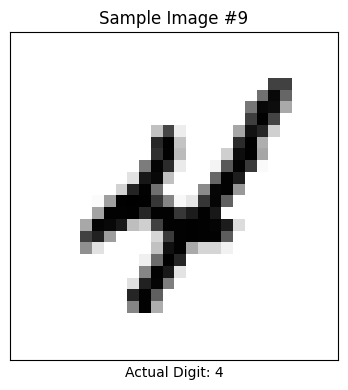

This image represents the digit: 4


In [3]:
# Display a single digit image
digit = 9  # Change this to see different digits
a = x_train[digit]

plt.figure(figsize=(4, 4))
plt.imshow(a.reshape(28, 28), cmap='gray_r') # Reshape 'a' back to 28x28
plt.title(f"Sample Image #{digit}")
plt.xlabel(f"Actual Digit: {y_train[digit]}")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

print(f"This image represents the digit: {y_train[digit]}")


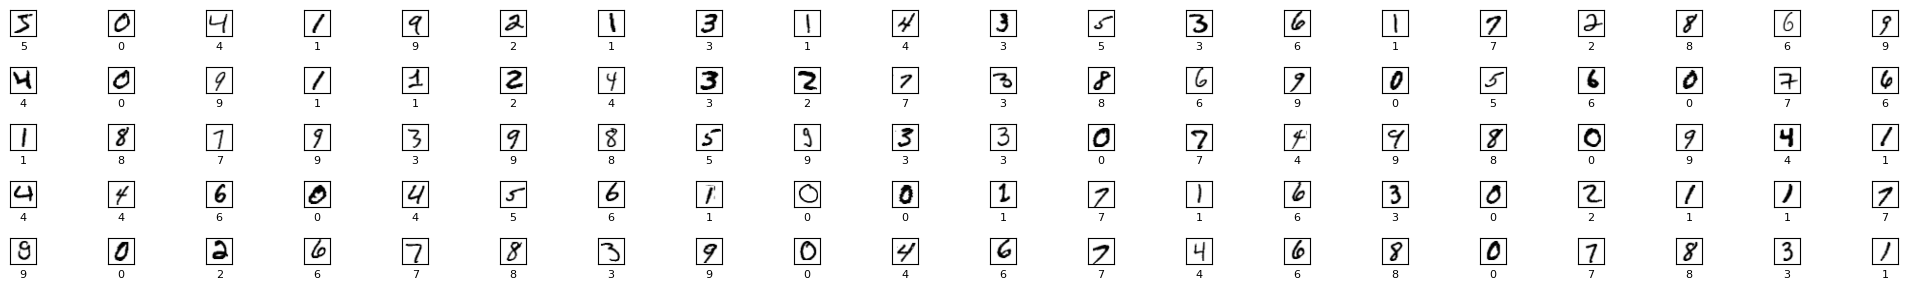

Each image shows the digit label below it


In [4]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(20, 3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i].reshape(28, 28), cmap=plt.cm.gray_r)

        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i], fontsize=8)
        i += 1

plt.tight_layout()
plt.show()

print("Each image shows the digit label below it")

In [ ]:

#  NORMALIZE THE DATA (Scale pixel values from 0-255 to 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#  FLATTEN THE IMAGES (28x28 → 784 pixels)
# Dense layers need 1D input, so convert 2D images to 1D vectors
x_train = x_train.reshape(-1, 28 * 28)  # Shape: (60000, 784)
x_test = x_test.reshape(-1, 28 * 28)    # Shape: (10000, 784)

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")

Training data shape: (60000, 784)
Training labels shape: (60000,)


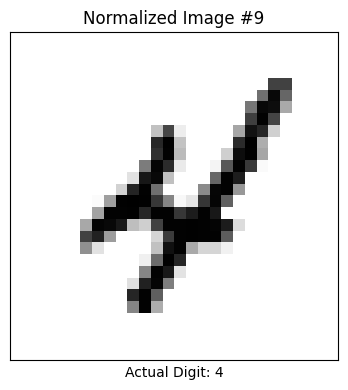

Same image after normalization - digit: 4


In [7]:
# Display the same digit after normalization
digit = 9

plt.figure(figsize=(4, 4))
plt.imshow(x_train[digit].reshape(28, 28), cmap='gray_r')
plt.title(f"Normalized Image #{digit}")
plt.xlabel(f"Actual Digit: {y_train[digit]}")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

print(f"Same image after normalization - digit: {y_train[digit]}")


In [8]:
model = keras.Sequential([
    keras.Input(shape=(784,)),  # ✓ New style - explicit Input layer
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
# COMPILE THE MODEL
model.compile(
    optimizer='adam',                    # Optimizer: Adam is good for most tasks
    loss='sparse_categorical_crossentropy',  # Loss: for integer labels (0-9)
    metrics=['accuracy']                 # Track accuracy during training
)

In [ ]:
#  VIEW MODEL ARCHITECTURE
print("\n--- Model Architecture ---")
model.summary()


--- Model Architecture ---


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#  TRAIN THE MODEL
print("\n--- Training ---")
history = model.fit(
    x_train, y_train,
    epochs=10,              # Number of training iterations
    batch_size=32,          # Samples per batch
    validation_split=0.1,   # Use 10% of training data for validation
    verbose=1               # Show progress bar
)


--- Training ---
Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8886 - loss: 0.3779 - val_accuracy: 0.9737 - val_loss: 0.0955
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9717 - loss: 0.0914 - val_accuracy: 0.9765 - val_loss: 0.0764
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9818 - loss: 0.0585 - val_accuracy: 0.9778 - val_loss: 0.0729
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9863 - loss: 0.0417 - val_accuracy: 0.9797 - val_loss: 0.0743
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9887 - loss: 0.0330 - val_accuracy: 0.9822 - val_loss: 0.0693
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9918 - loss: 0.0240 - val_accuracy: 0.9797 - val_loss: 0.0878
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9923 - loss: 0.0223 - val_accuracy: 0.9800 - val_loss: 0.0842
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy

In [ ]:
# SAVE THE MODEL (optional - use this to load later)
model.save('mnist_model.h5')
print("\nModel saved as 'mnist_model.h5'")


Model saved as 'mnist_model.h5'


In [13]:
# Modern way - works with new .keras format
model = keras.models.load_model('mnist_model.h5')
predictions = model.predict(x_test[:5])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [ ]:
# EVALUATE ON TEST DATA
print("\n--- Test Evaluation ---")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


--- Test Evaluation ---
Test Loss: 0.1008
Test Accuracy: 0.9777


In [ ]:
#  MAKE PREDICTIONS ON SOME TEST SAMPLES
print("\n--- Sample Predictions ---")
predictions = model.predict(x_test[:5])


--- Sample Predictions ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [16]:
for i in range(5):
    predicted_digit = np.argmax(predictions[i])
    true_digit = y_test[i]
    confidence = np.max(predictions[i])
    print(f"Sample {i+1}: Predicted={predicted_digit}, Actual={true_digit}, Confidence={confidence:.2%}")


Sample 1: Predicted=7, Actual=7, Confidence=100.00%
Sample 2: Predicted=2, Actual=2, Confidence=100.00%
Sample 3: Predicted=1, Actual=1, Confidence=100.00%
Sample 4: Predicted=0, Actual=0, Confidence=100.00%
Sample 5: Predicted=4, Actual=4, Confidence=100.00%


Predictions on 100 Random Test Samples (5x20 Grid)
Blue text = Correct prediction
Red text = Incorrect prediction
Green text = True label



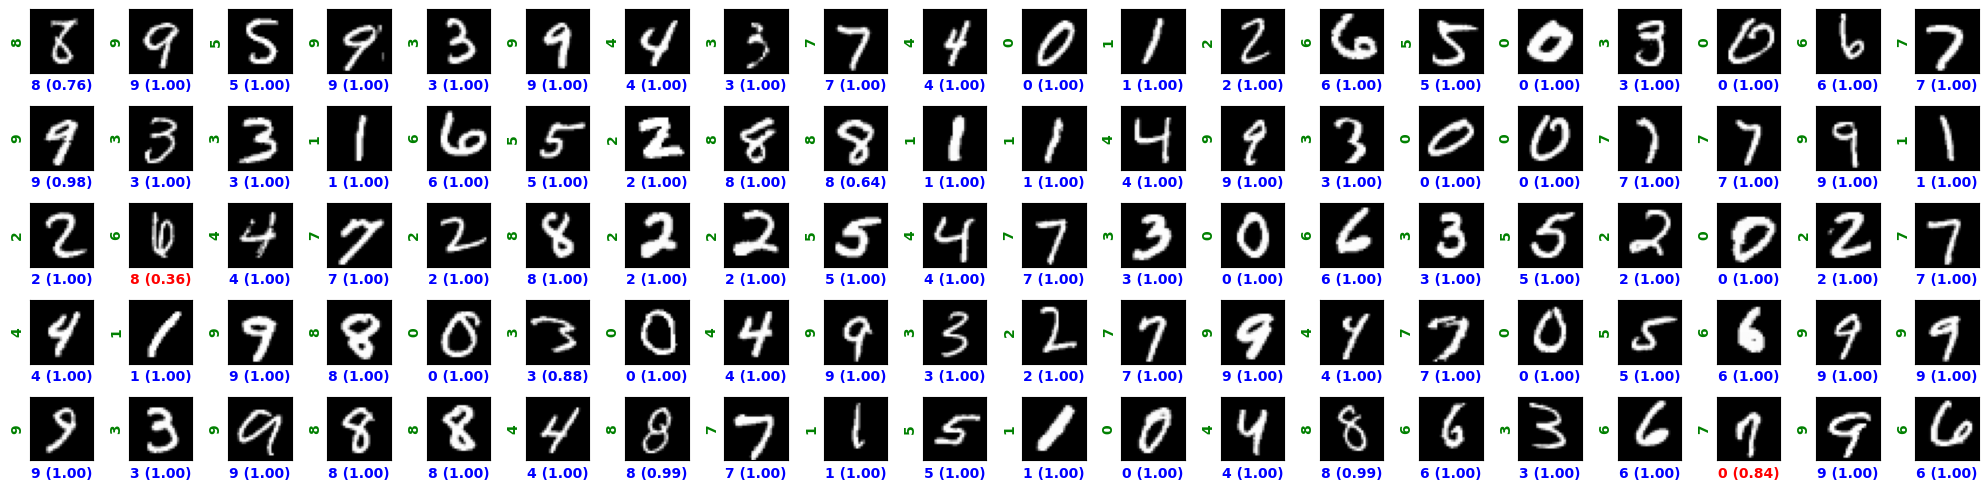


Prediction format: [Predicted Digit (Confidence Score)]
X-axis label color: Blue=Correct, Red=Wrong
Y-axis label color: Green=True Label


In [17]:
import random

print("Predictions on 100 Random Test Samples (5x20 Grid)")

print("Blue text = Correct prediction")
print("Red text = Incorrect prediction")
print("Green text = True label\n")

ROWS = 5
COLS = 20

random_indices = random.sample(range(x_test.shape[0]), ROWS*COLS)
sample_images = x_test[random_indices, :]
sample_labels = y_test[random_indices]
predictions = model.predict(sample_images, verbose=0)

i = 0

plt.figure(figsize=(20, 5))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap=plt.cm.gray)
        plt.xticks([])
        plt.yticks([])

        prediction = np.argmax(predictions[i])
        confidence = predictions[i][prediction]

        # Color code: Blue=correct, Red=wrong
        pred_color = 'b' if sample_labels[i] == prediction else 'r'

        plt.xlabel(f"{prediction} ({confidence:.2f})", color=pred_color, fontweight='bold')
        plt.ylabel(sample_labels[i], color='g', fontweight='bold')
        i += 1

plt.tight_layout()
plt.show()

print("\nPrediction format: [Predicted Digit (Confidence Score)]")
print("X-axis label color: Blue=Correct, Red=Wrong")
print("Y-axis label color: Green=True Label")

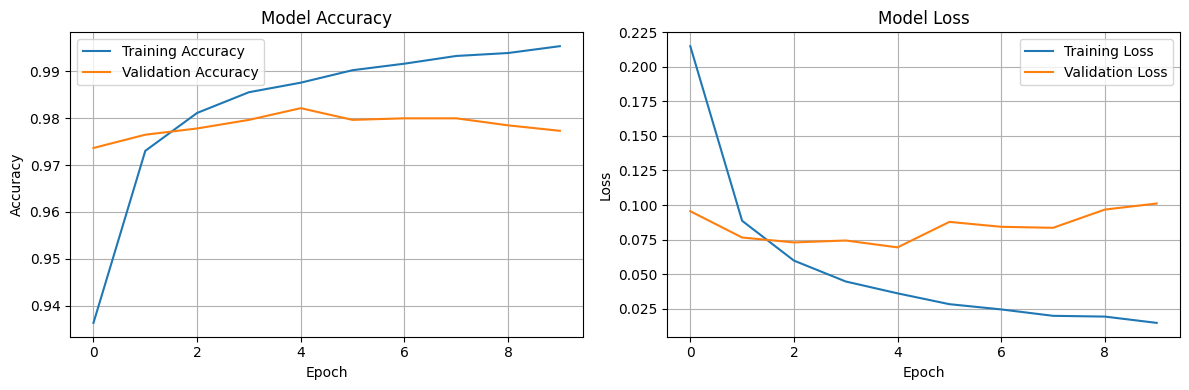

In [ ]:
# VISUALIZE TRAINING HISTORY
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.grid(True)

plt.tight_layout()
plt.show()